In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from collections import defaultdict

import os
import os.path as osp

In [2]:
import re
stream_re = re.compile(r"(\w+)_\w+.npz")

index_file = "./data/Cert_136033-149442_7TeV_Apr21ReReco_Collisions10_JSON_v2.txt"

columns = [
    'run', 'lumiBlock', 'timeHigh', 'timeLow',
    'jet_pt', 'jet_eta', 'jet_phi', 'jet_mass', 'jet_fX', 'yet_fY', 'yet_fZ',
    'pho_pt', 'pho_eta', 'pho_phi',             'pho_fX', 'pho_fY', 'pho_fZ',
    'muo_pt', 'muo_eta', 'muo_phi', 'muo_mass', 'muo_fX', 'muo_fY', 'muo_fZ',
    'instantLumi'
]

features = [
    'jet_pt', 'jet_eta', 'jet_phi', 'jet_mass', 'jet_fX', 'yet_fY', 'yet_fZ',
    'pho_pt', 'pho_eta', 'pho_phi',             'pho_fX', 'pho_fY', 'pho_fZ',
    'muo_pt', 'muo_eta', 'muo_phi', 'muo_mass', 'muo_fX', 'muo_fY', 'muo_fZ',
    'instantLumi'
]

In [3]:
def read(path='./data/', target_stream = 'minibias', columns = None):
    df = pd.DataFrame()

    get_stream = lambda item: stream_re.findall(item)[0]
    
    streams_data = list()
    
    for item in [ x for x in os.listdir(path) if x.endswith('.npz') ]:
        stream = get_stream(item)
        if stream != target_stream:
            continue

        print 'Reading', item
        
        npz = np.load(osp.join(path, item))

        assert npz.keys() == ['array']
        
        array = npz['array']
        df = pd.DataFrame(array)
        
        streams_data.append(df)
        npz.close()
        break
    
    df = pd.concat(streams_data)

    if columns is not None:
        df.columns = columns

    df['run'] = df['run'].astype('int64')
    df['lumiBlock'] = df['lumiBlock'].astype('int64')
    df['time'] = df['timeHigh'] * 1.0e+6 + df['timeLow']

    df[features] = df[features].astype('float32')

    del df['timeHigh']
    del df['timeLow']

    return df

In [4]:
data = read(columns=columns)

Reading minibias_pac.npz


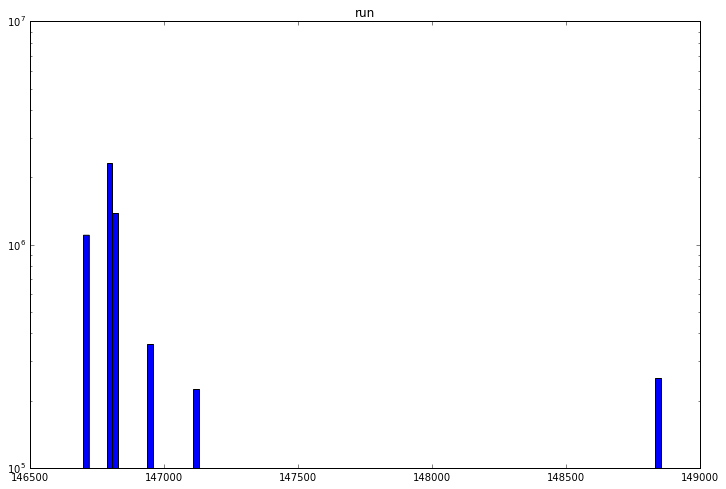

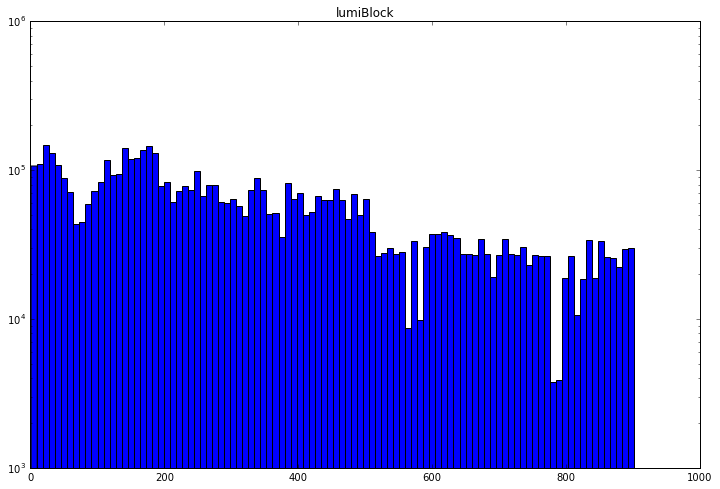

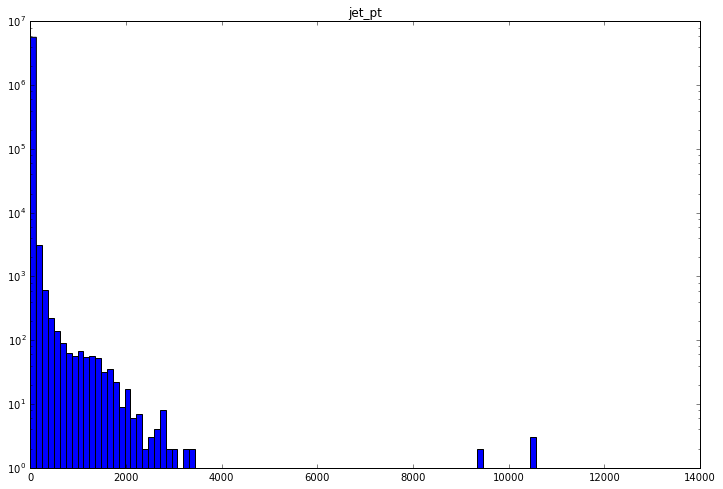

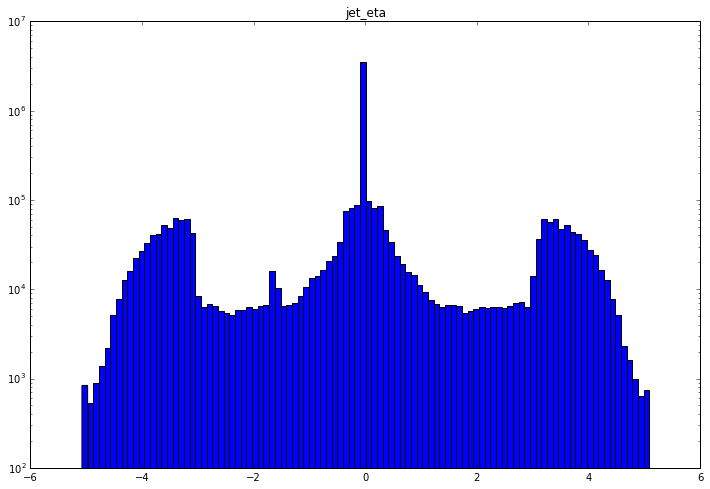

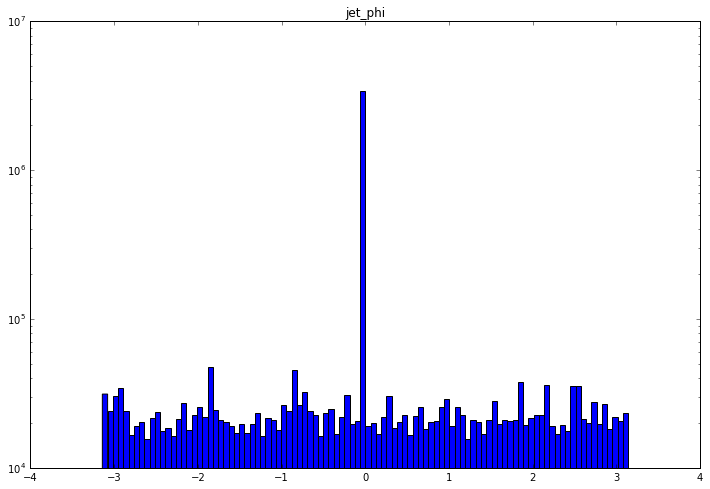

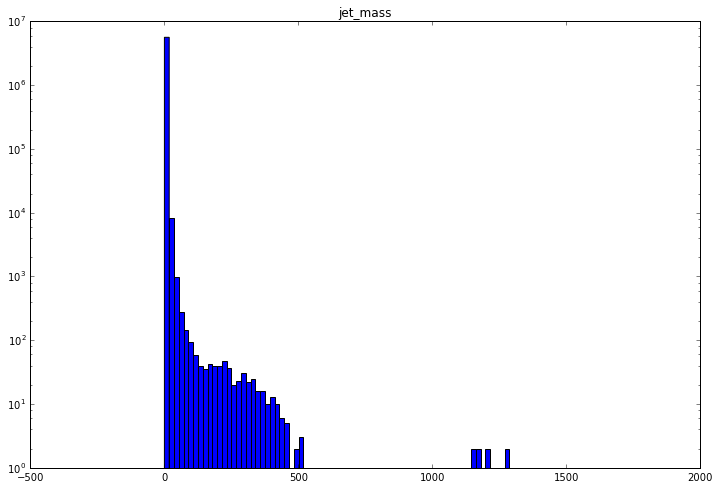

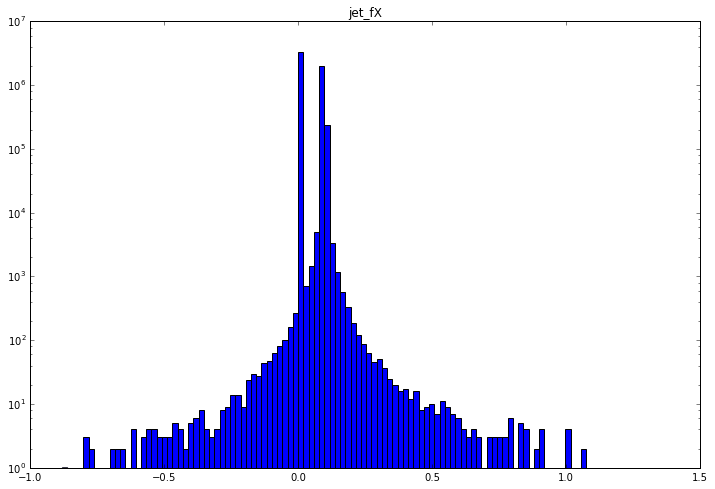

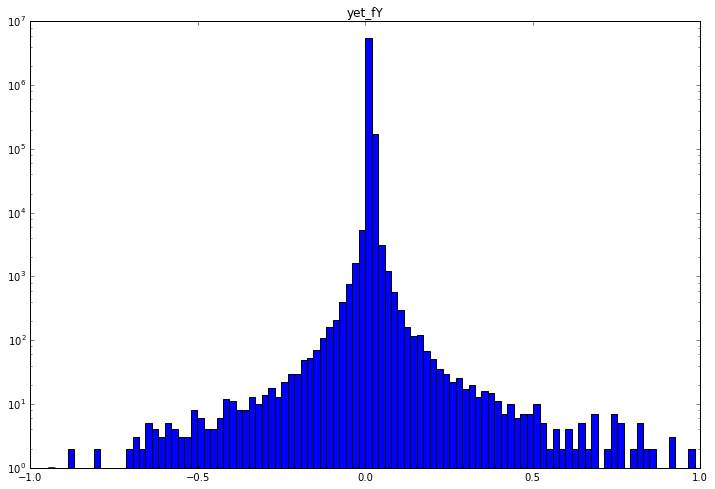

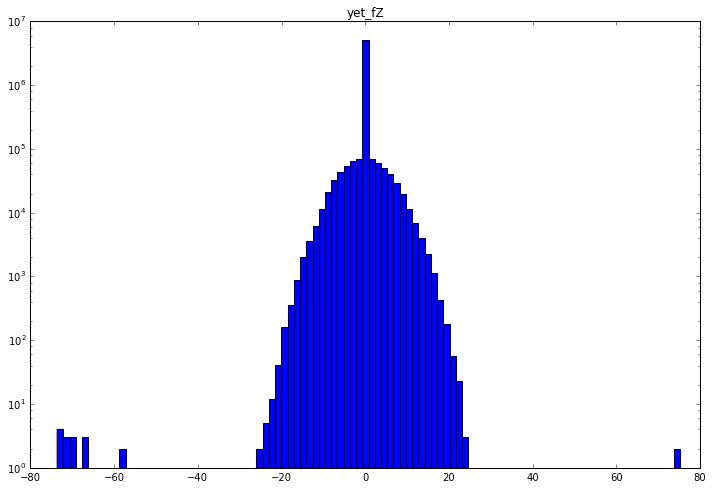

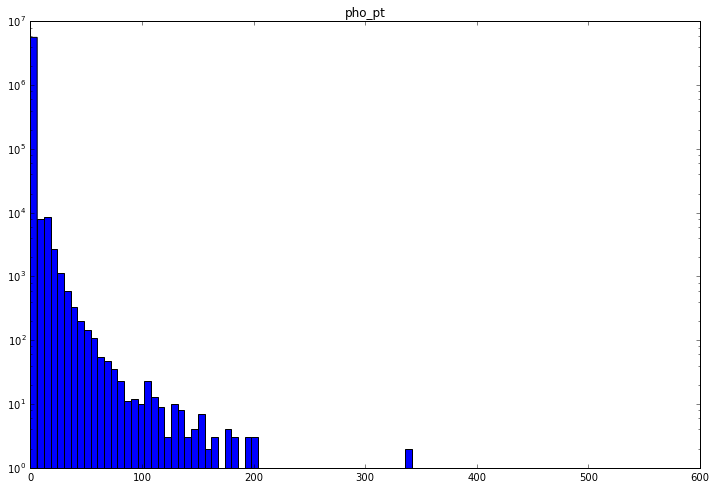

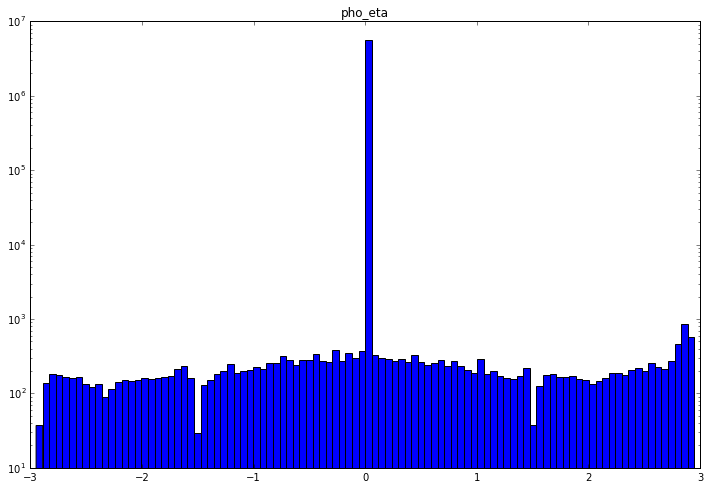

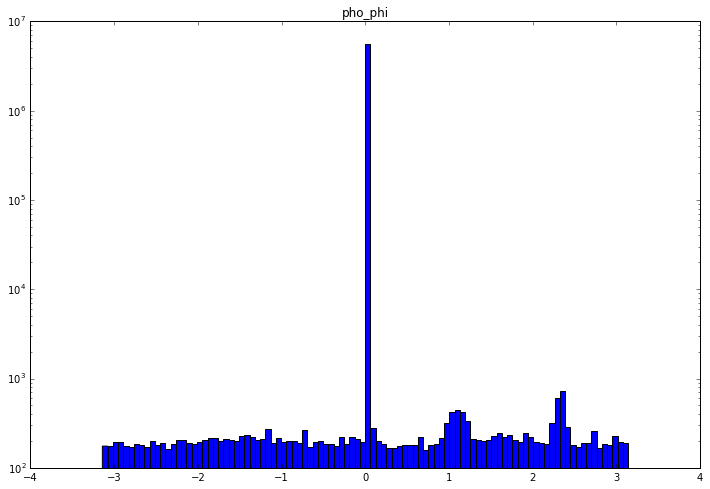

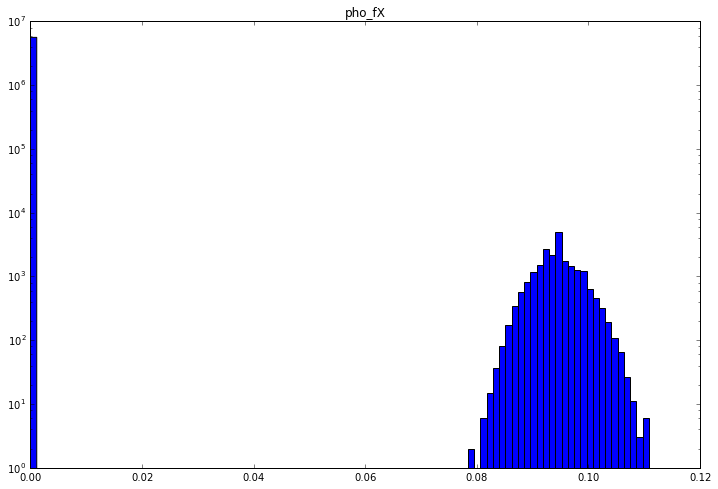

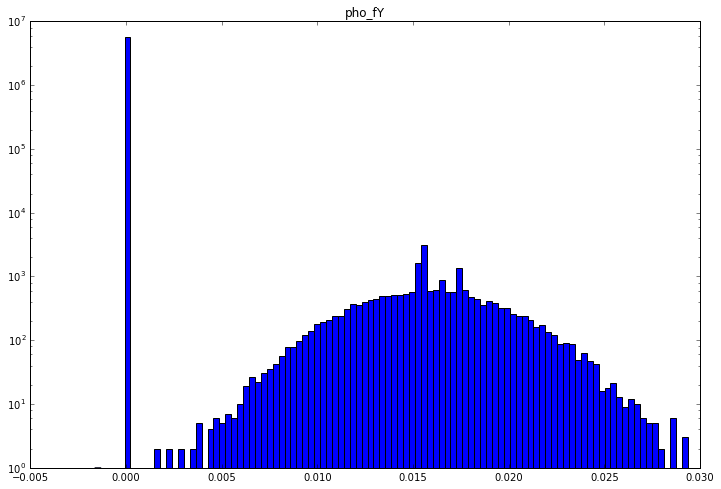

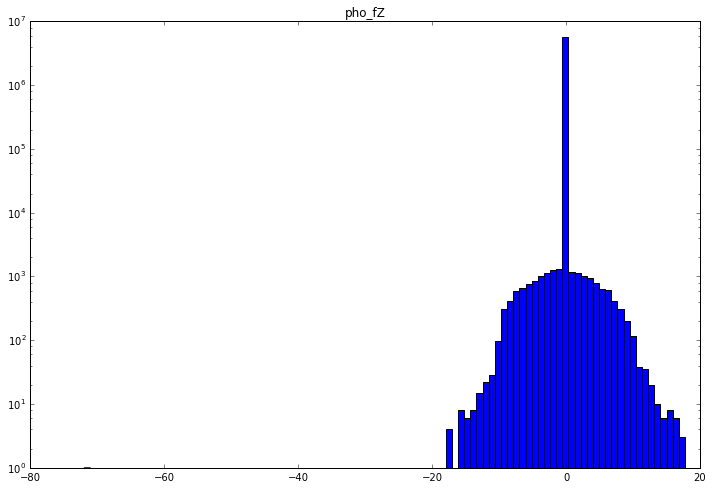

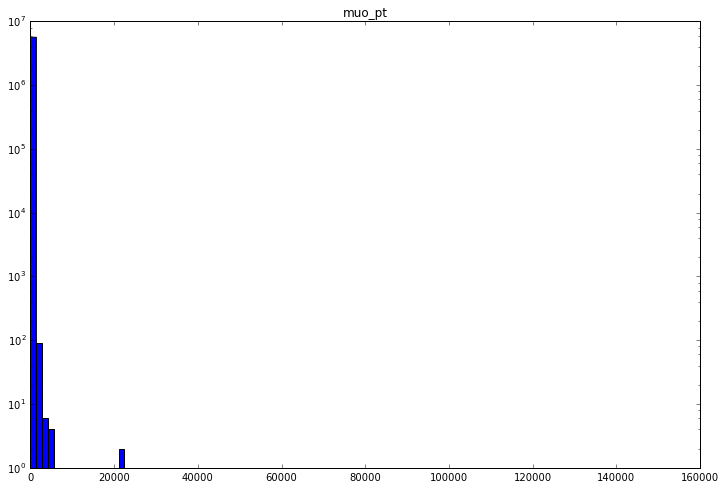

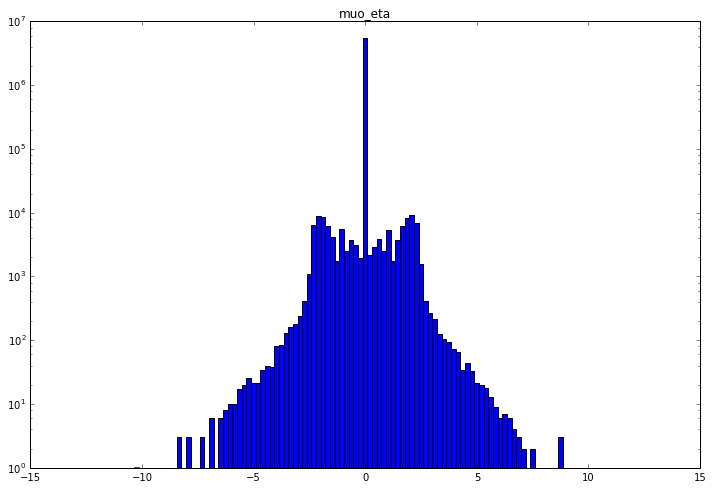

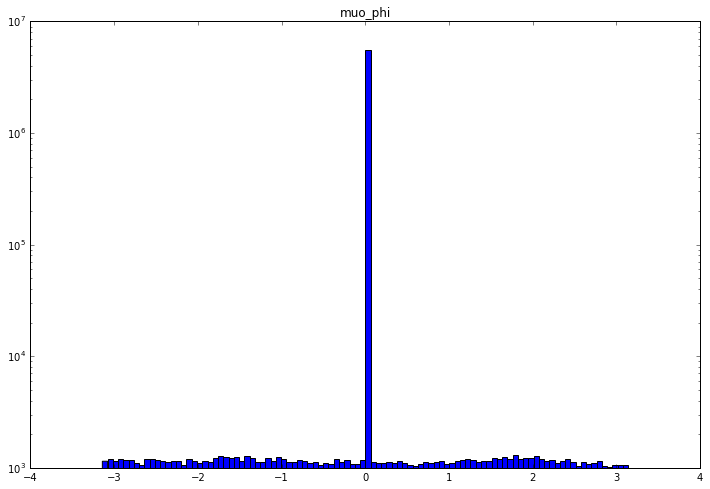

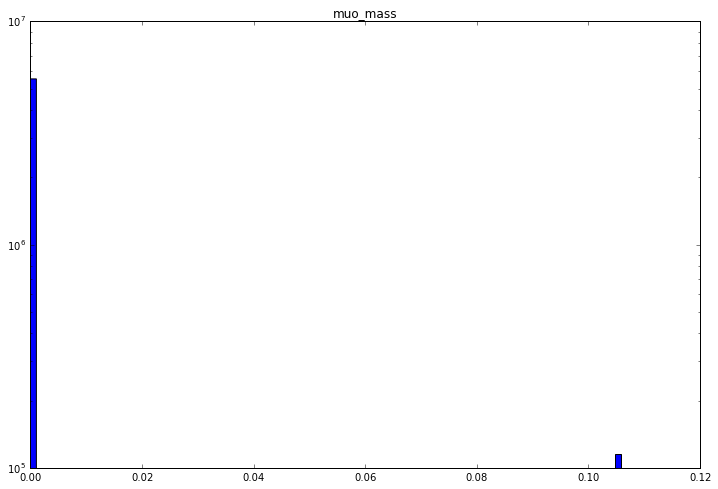

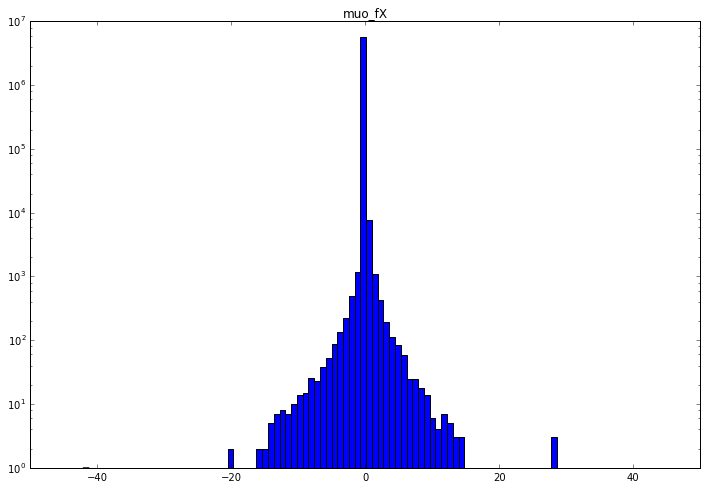

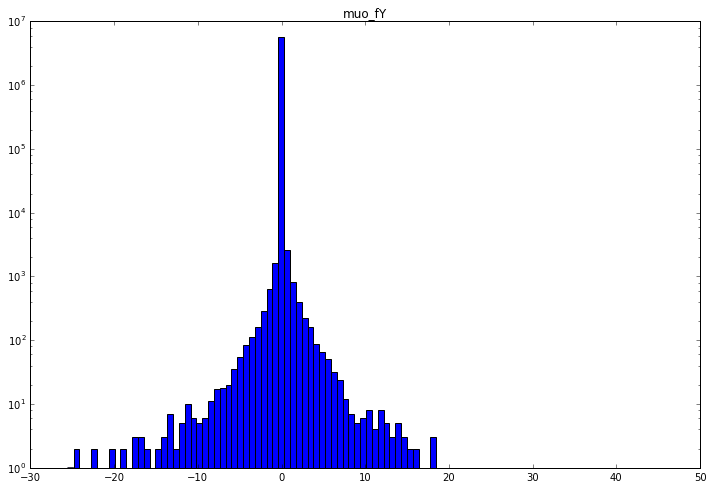

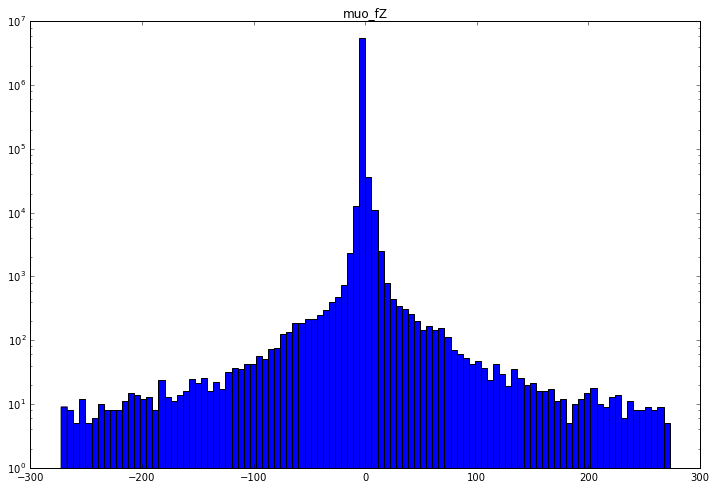

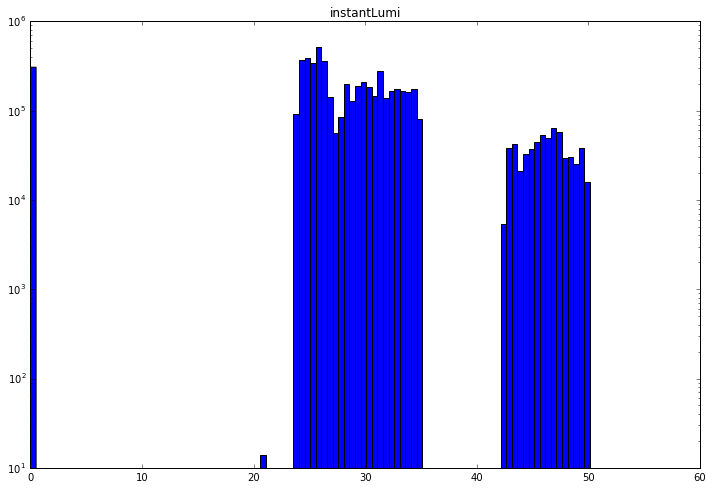

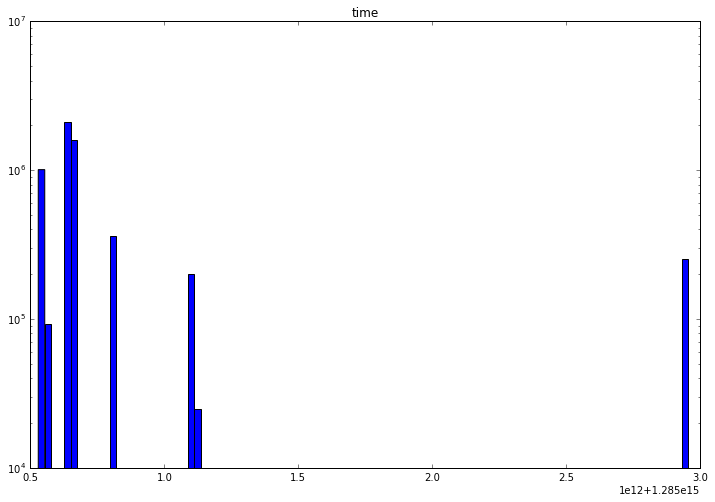

In [12]:
for k in data.keys():
    plt.figure(figsize=(12, 8))
    plt.title(k)
    _ = plt.hist(data[k], bins = 100, log=True)
    plt.show()